In [1]:
import requests
from tqdm.auto import tqdm
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bz2

In [2]:
with open('E:\git_exercise\df_nashdomrf.pkl', 'rb') as f:
    df = pkl.load(f)

In [4]:
#Добавляем столбец с годом
df['objReady100PercDt'] = pd.to_datetime(df['objReady100PercDt'])
df['year_'] = df['objReady100PercDt'].dt.strftime('%Y')

In [14]:
#Убираем пустые значения из столбца Средняя цена
df_price=df.dropna(subset=['objPriceAvg'])
#Убираем пустые значения из столбца Площадь жилья
df_living=df.dropna(subset=['objSquareLiving'])

In [15]:
#Группируем по региону, находим среднюю цену
average_price=df_price.groupby('region').mean('objPriceAvg')
new_df = average_price[['objPriceAvg']].copy()

#Dataframe по объемам жилья в регионах
square_living_reg = df_living.groupby('region')['objSquareLiving'].sum()

#Dataframe по объемам жилья по годам
square_living_year = df_living.groupby('year_')['objSquareLiving'].sum()


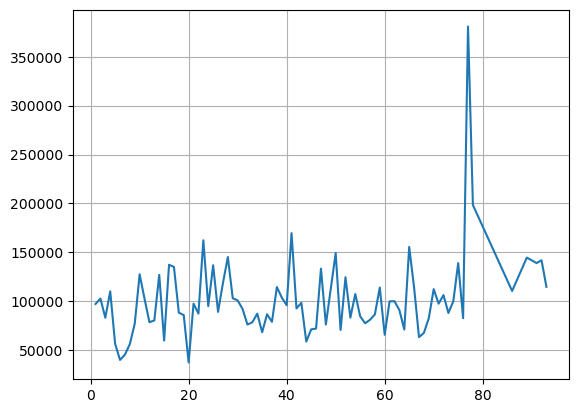

In [11]:
#Строим график по цене по всем регионам
plt.plot(new_df)
#for i, val in enumerate(result.values):
#    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':5})
# включаем основную сетку
plt.grid(which='major')
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

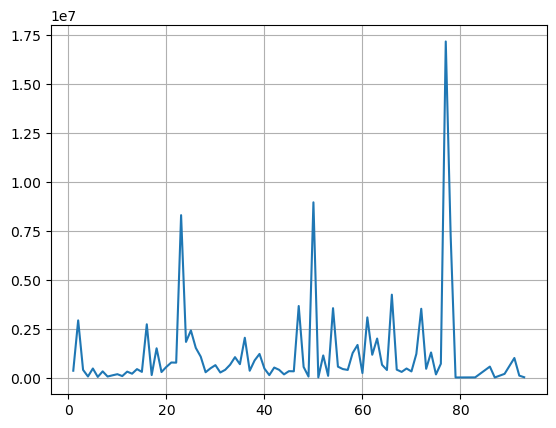

In [16]:
#Строим график по площади жилья по всем регионам
plt.plot(square_living_reg)
plt.grid(which='major')
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

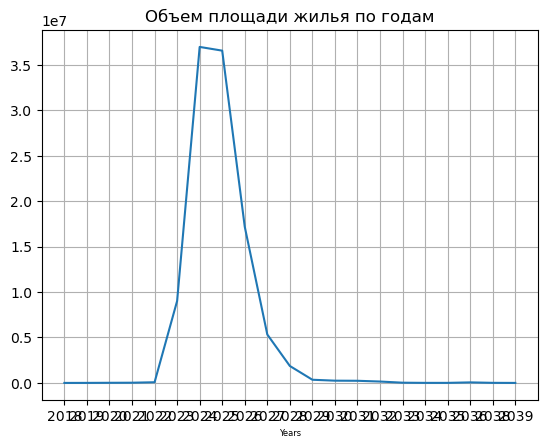

In [20]:
#Строим график по площади жилья по годам
plt.plot(square_living_year)
plt.grid(which='major')
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
#plt.xlabel('x', fontsize=6)
#plt.ylabel('y', fontsize=6)
plt.xlabel('Years',fontsize=6)
plt.title('Объем площади жилья по годам')
#plt.tight_layout()
plt.show()

In [12]:
#Выберем 10 регионов с наибольшей средней ценой, далее работаем с ними
#av_pr=new_df.sort_values(axis=0, ascending = False)
av_pr=new_df.sort_values(['objPriceAvg'], ascending = False)
av_pr=av_pr.head(10).reset_index()
av_pr['region']=av_pr['region'].astype(str)
#av_pr['region'].dtype
av_pr

,region,objPriceAvg
0,77,380934.022152
1,78,198385.221945
2,41,169584.000000
3,23,162334.729345
4,65,155523.868421
5,50,149365.007737
6,28,145182.166667
7,89,144591.076923
8,92,141886.416667
9,91,139035.682759


In [21]:
#Создаем Dataframe на 10 регионов с нужными столбцами
ten_reg=df.loc[df['region']. isin([77, 78, 41,23,65,50,28,89,92,91])]
ten_reg = ten_reg[['region','objPriceAvg','objSquareLiving','objFloorCnt','objFlatCnt','objFlatSq','objInfrstrObjPrkngCnt']].copy()
ten_reg['objFlatSq']=ten_reg['objFlatSq'].astype(float)
ten_reg1 = ten_reg.groupby('region')['objPriceAvg'].mean().reset_index()
ten_reg2=ten_reg.groupby('region')['objSquareLiving'].sum().reset_index()
ten_reg3=ten_reg.groupby('region')['objFloorCnt'].mean().reset_index()
ten_reg4=ten_reg.groupby('region')['objFlatCnt'].sum().reset_index()
ten_reg5=ten_reg.groupby('region')['objFlatSq'].sum().reset_index()
ten_reg6=ten_reg.groupby('region')['objInfrstrObjPrkngCnt'].sum().reset_index()

In [22]:
#Объединяем столбцы
ten_reg1['objSquareLiving']=ten_reg2['objSquareLiving']
ten_reg1['objFloorCnt']=ten_reg3['objFloorCnt']
ten_reg1['objFlatCnt']=ten_reg4['objFlatCnt']
ten_reg1['objFlatSq']=ten_reg5['objFlatSq']
ten_reg1['objInfrstrObjPrkngCnt']=ten_reg6['objInfrstrObjPrkngCnt']

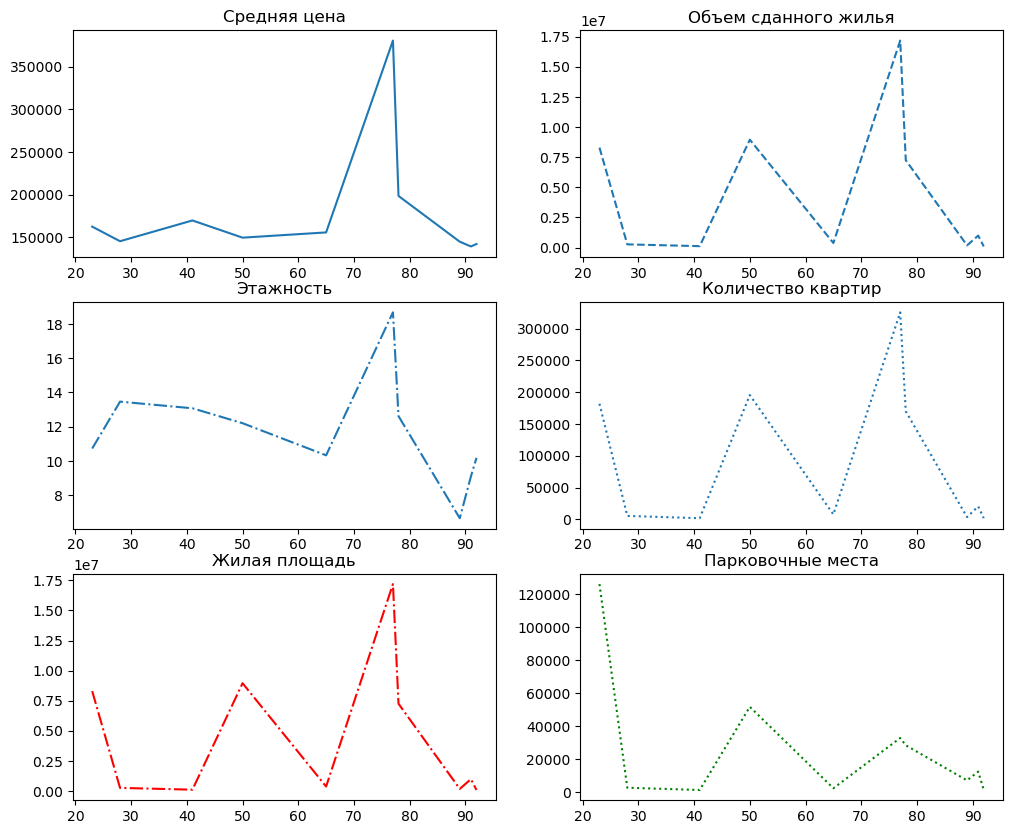

In [23]:
#Строим графики
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs[0, 0].plot(ten_reg1['region'], ten_reg1['objPriceAvg'], '-')
axs[0, 1].plot(ten_reg1['region'], ten_reg1['objSquareLiving'], '--')
axs[1, 0].plot(ten_reg1['region'], ten_reg1['objFloorCnt'], '-.')
axs[1, 1].plot(ten_reg1['region'], ten_reg1['objFlatCnt'], ':')
axs[2, 0].plot(ten_reg1['region'], ten_reg1['objFlatSq'], '-.r')
axs[2, 1].plot(ten_reg1['region'], ten_reg1['objInfrstrObjPrkngCnt'], ':g')
axs[0,0].title.set_text('Средняя цена')
axs[0,1].title.set_text('Объем сданного жилья')
axs[1,0].title.set_text('Этажность')
axs[1,1].title.set_text('Количество квартир')
axs[2,0].title.set_text('Жилая площадь')
axs[2,1].title.set_text('Парковочные места')

In [ ]:
#Выводы
#Регион 77 (Москва) - лидер почти по всем показателям, кроме количества парковочных мест
#По общему количеству парковочных мест лидирует 23 регион, в котором относительно низкая средня цена (4 место в выборке) 
#и одновременно высокий показатель количества квартир и сданного жилья. Это логично - при низкой стоимости жилья проще купить,
#например, место на подземной парковке
#Схожая тенденция в 50 регионе (Московская область)- 5 место по цене, при этом 2 место по другим показателям, кроме этажности
#Регионы 91 и 92 (Крым и Севастополь) с самой низкой ценой также показывают самые низкие результаты по остальным параметрам

<Axes: xlabel='region', ylabel='objPriceAvg'>

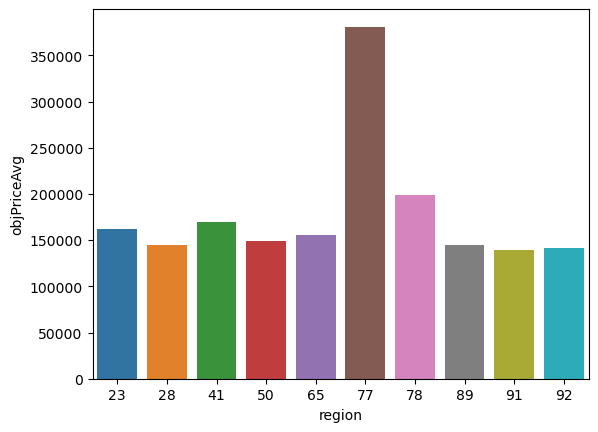

In [39]:
#Пример диаграммы на seaborn
x=ten_reg1['region']
y=ten_reg1['objPriceAvg']
sns.barplot(x=x, y=y)